In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

子目录或文件 -p 已经存在。
处理: -p 时出错。
子目录或文件 input 已经存在。
处理: input 时出错。
子目录或文件 -p 已经存在。
处理: -p 时出错。
子目录或文件 outputs 已经存在。
处理: outputs 时出错。


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers

############## Q1c  #################

# optim_g = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5,0.999))
# optim_d = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5,0.999))

#####################################

optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:15,  7.56it/s]                                                                                               


Epoch 1 of 100
Generator loss: 1.21880762, Discriminator loss: 1.05227568


118it [00:15,  7.54it/s]                                                                                               


Epoch 2 of 100
Generator loss: 1.07911920, Discriminator loss: 1.17338932


118it [00:15,  7.40it/s]                                                                                               


Epoch 3 of 100
Generator loss: 1.42209378, Discriminator loss: 1.08160370


118it [00:15,  7.59it/s]                                                                                               


Epoch 4 of 100
Generator loss: 2.30421213, Discriminator loss: 1.35728725


118it [00:15,  7.60it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


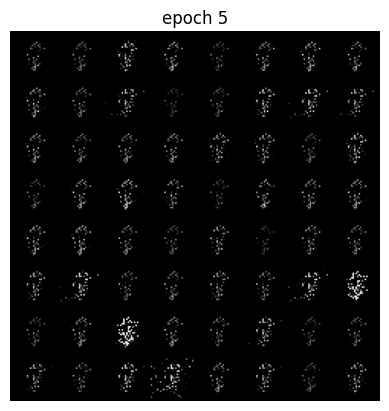

Epoch 5 of 100
Generator loss: 1.65984584, Discriminator loss: 1.18460877


118it [00:15,  7.64it/s]                                                                                               


Epoch 6 of 100
Generator loss: 0.84371818, Discriminator loss: 1.29813707


118it [00:15,  7.70it/s]                                                                                               


Epoch 7 of 100
Generator loss: 0.86761164, Discriminator loss: 1.30796470


118it [00:15,  7.53it/s]                                                                                               


Epoch 8 of 100
Generator loss: 2.28464812, Discriminator loss: 1.17789734


118it [00:15,  7.75it/s]                                                                                               


Epoch 9 of 100
Generator loss: 2.89725039, Discriminator loss: 0.96675699


118it [00:15,  7.61it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


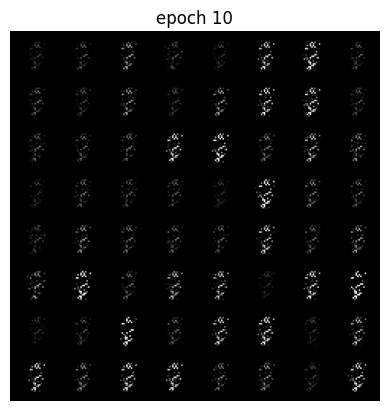

Epoch 10 of 100
Generator loss: 1.76742164, Discriminator loss: 1.24572945


118it [00:15,  7.48it/s]                                                                                               


Epoch 11 of 100
Generator loss: 1.20950389, Discriminator loss: 1.23315068


118it [00:15,  7.64it/s]                                                                                               


Epoch 12 of 100
Generator loss: 1.59725986, Discriminator loss: 1.32047869


118it [00:15,  7.73it/s]                                                                                               


Epoch 13 of 100
Generator loss: 1.52826659, Discriminator loss: 1.32111175


118it [00:15,  7.49it/s]                                                                                               


Epoch 14 of 100
Generator loss: 1.58626855, Discriminator loss: 1.13408639


118it [00:15,  7.66it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


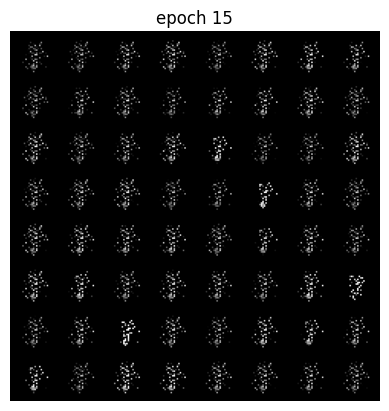

Epoch 15 of 100
Generator loss: 1.54730755, Discriminator loss: 1.14762328


118it [00:15,  7.78it/s]                                                                                               


Epoch 16 of 100
Generator loss: 1.54233241, Discriminator loss: 1.23434028


118it [00:15,  7.63it/s]                                                                                               


Epoch 17 of 100
Generator loss: 1.55508550, Discriminator loss: 1.11200135


118it [00:15,  7.79it/s]                                                                                               


Epoch 18 of 100
Generator loss: 1.29474442, Discriminator loss: 1.25355402


118it [00:15,  7.50it/s]                                                                                               


Epoch 19 of 100
Generator loss: 1.43481946, Discriminator loss: 1.19138841


118it [00:15,  7.60it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


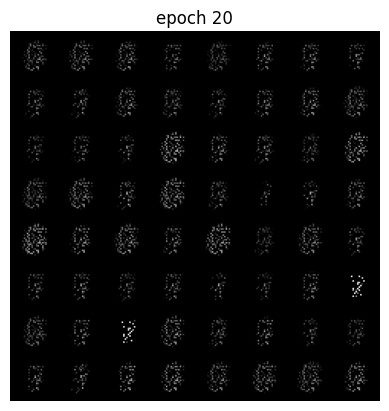

Epoch 20 of 100
Generator loss: 1.33885381, Discriminator loss: 1.12975822


118it [00:16,  7.21it/s]                                                                                               


Epoch 21 of 100
Generator loss: 1.24522238, Discriminator loss: 1.25546245


118it [00:15,  7.84it/s]                                                                                               


Epoch 22 of 100
Generator loss: 1.41025250, Discriminator loss: 1.06031588


118it [00:16,  7.22it/s]                                                                                               


Epoch 23 of 100
Generator loss: 1.24964596, Discriminator loss: 1.19070322


118it [00:15,  7.49it/s]                                                                                               


Epoch 24 of 100
Generator loss: 1.55333544, Discriminator loss: 1.05123257


118it [00:16,  7.28it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


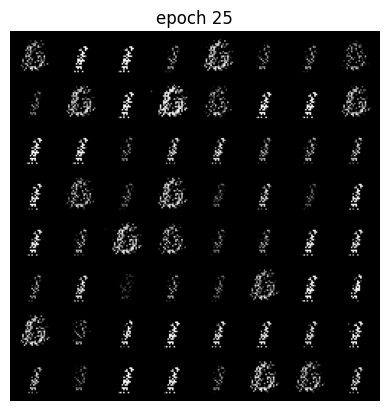

Epoch 25 of 100
Generator loss: 1.69779797, Discriminator loss: 1.11577251


118it [00:15,  7.49it/s]                                                                                               


Epoch 26 of 100
Generator loss: 2.22078100, Discriminator loss: 0.89736316


118it [00:16,  7.33it/s]                                                                                               


Epoch 27 of 100
Generator loss: 1.66256456, Discriminator loss: 0.79844880


118it [00:16,  7.19it/s]                                                                                               


Epoch 28 of 100
Generator loss: 2.28373071, Discriminator loss: 0.77010605


118it [00:15,  7.42it/s]                                                                                               


Epoch 29 of 100
Generator loss: 2.24433618, Discriminator loss: 0.77667705


118it [00:16,  7.02it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


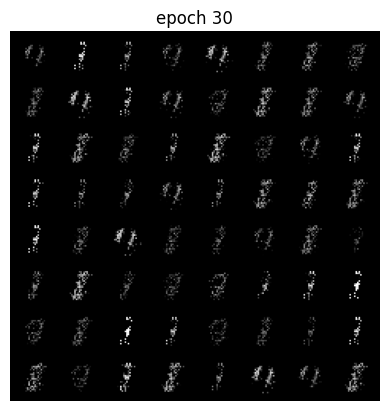

Epoch 30 of 100
Generator loss: 1.82167163, Discriminator loss: 0.94184489


118it [00:16,  7.09it/s]                                                                                               


Epoch 31 of 100
Generator loss: 1.75478092, Discriminator loss: 0.96629702


118it [00:15,  7.54it/s]                                                                                               


Epoch 32 of 100
Generator loss: 1.80632140, Discriminator loss: 0.91758530


118it [00:16,  7.12it/s]                                                                                               


Epoch 33 of 100
Generator loss: 1.85482007, Discriminator loss: 0.89544176


118it [00:16,  7.33it/s]                                                                                               


Epoch 34 of 100
Generator loss: 2.83190248, Discriminator loss: 0.63568653


118it [00:15,  7.67it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


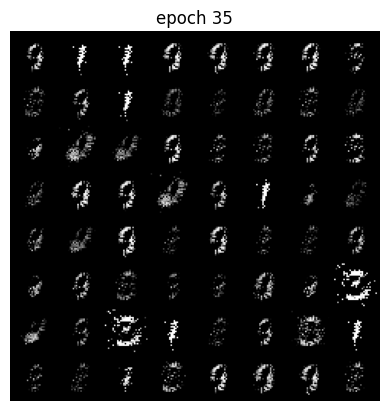

Epoch 35 of 100
Generator loss: 2.67618571, Discriminator loss: 0.69718562


118it [00:15,  7.62it/s]                                                                                               


Epoch 36 of 100
Generator loss: 2.61301285, Discriminator loss: 0.67991371


118it [00:15,  7.62it/s]                                                                                               


Epoch 37 of 100
Generator loss: 2.67968030, Discriminator loss: 0.61502045


118it [00:15,  7.51it/s]                                                                                               


Epoch 38 of 100
Generator loss: 2.60709449, Discriminator loss: 0.73529374


118it [00:15,  7.69it/s]                                                                                               


Epoch 39 of 100
Generator loss: 2.24016722, Discriminator loss: 0.71080789


118it [00:16,  7.08it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


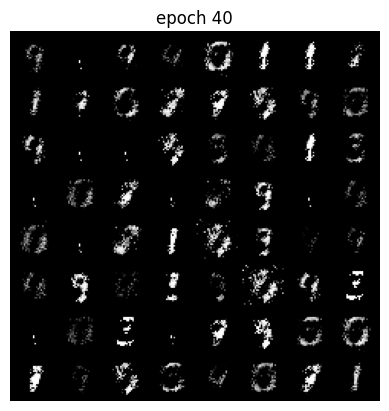

Epoch 40 of 100
Generator loss: 2.20753558, Discriminator loss: 0.77720543


118it [00:15,  7.49it/s]                                                                                               


Epoch 41 of 100
Generator loss: 2.11504245, Discriminator loss: 0.79266066


118it [00:15,  7.56it/s]                                                                                               


Epoch 42 of 100
Generator loss: 1.89826411, Discriminator loss: 0.81038775


118it [00:15,  7.61it/s]                                                                                               


Epoch 43 of 100
Generator loss: 2.04421792, Discriminator loss: 0.73066523


118it [00:15,  7.58it/s]                                                                                               


Epoch 44 of 100
Generator loss: 2.09299269, Discriminator loss: 0.74494201


118it [00:15,  7.61it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


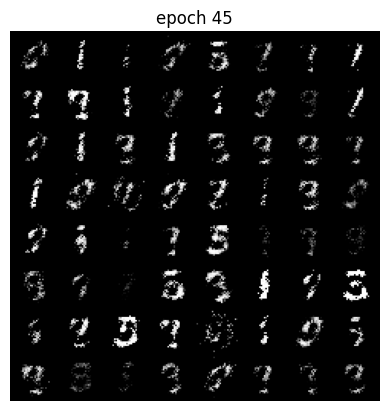

Epoch 45 of 100
Generator loss: 2.00540646, Discriminator loss: 0.76247207


118it [00:15,  7.57it/s]                                                                                               


Epoch 46 of 100
Generator loss: 2.07589411, Discriminator loss: 0.71781383


118it [00:15,  7.62it/s]                                                                                               


Epoch 47 of 100
Generator loss: 2.08910924, Discriminator loss: 0.72317359


118it [00:15,  7.48it/s]                                                                                               


Epoch 48 of 100
Generator loss: 2.08615523, Discriminator loss: 0.74537293


118it [00:15,  7.72it/s]                                                                                               


Epoch 49 of 100
Generator loss: 2.04855650, Discriminator loss: 0.77432198


118it [00:15,  7.70it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


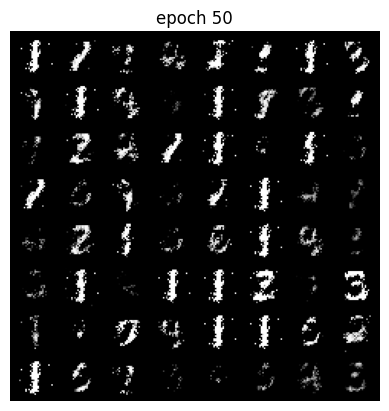

Epoch 50 of 100
Generator loss: 2.27606494, Discriminator loss: 0.74716363


118it [00:15,  7.66it/s]                                                                                               


Epoch 51 of 100
Generator loss: 2.17469977, Discriminator loss: 0.67801635


118it [00:14,  7.92it/s]                                                                                               


Epoch 52 of 100
Generator loss: 2.46055039, Discriminator loss: 0.61044138


118it [00:15,  7.66it/s]                                                                                               


Epoch 53 of 100
Generator loss: 2.38428217, Discriminator loss: 0.67782091


118it [00:15,  7.76it/s]                                                                                               


Epoch 54 of 100
Generator loss: 2.72853336, Discriminator loss: 0.61358015


118it [00:15,  7.56it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


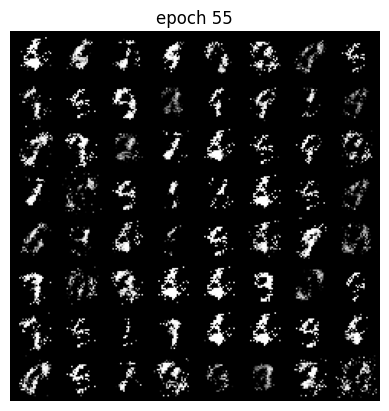

Epoch 55 of 100
Generator loss: 2.71508120, Discriminator loss: 0.63354196


118it [00:15,  7.79it/s]                                                                                               


Epoch 56 of 100
Generator loss: 2.70241952, Discriminator loss: 0.55858561


118it [00:15,  7.81it/s]                                                                                               


Epoch 57 of 100
Generator loss: 2.99189419, Discriminator loss: 0.57263459


118it [00:16,  7.15it/s]                                                                                               


Epoch 58 of 100
Generator loss: 2.80765302, Discriminator loss: 0.62705222


118it [00:15,  7.49it/s]                                                                                               


Epoch 59 of 100
Generator loss: 2.62750063, Discriminator loss: 0.62962195


118it [00:15,  7.47it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


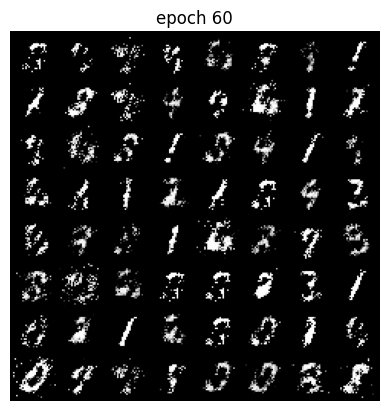

Epoch 60 of 100
Generator loss: 2.48287405, Discriminator loss: 0.66215014


118it [00:16,  7.18it/s]                                                                                               


Epoch 61 of 100
Generator loss: 2.52342947, Discriminator loss: 0.68084039


118it [00:15,  7.46it/s]                                                                                               


Epoch 62 of 100
Generator loss: 2.49805809, Discriminator loss: 0.60492614


118it [00:16,  7.26it/s]                                                                                               


Epoch 63 of 100
Generator loss: 2.56829169, Discriminator loss: 0.62973661


118it [00:15,  7.43it/s]                                                                                               


Epoch 64 of 100
Generator loss: 2.34941000, Discriminator loss: 0.72161590


118it [00:16,  7.34it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


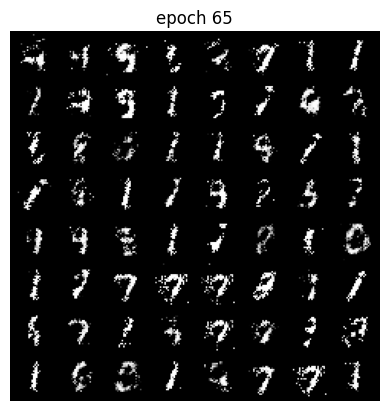

Epoch 65 of 100
Generator loss: 2.20750757, Discriminator loss: 0.72263090


118it [00:15,  7.43it/s]                                                                                               


Epoch 66 of 100
Generator loss: 2.31578698, Discriminator loss: 0.68559526


118it [00:15,  7.44it/s]                                                                                               


Epoch 67 of 100
Generator loss: 2.31491867, Discriminator loss: 0.66216956


118it [00:15,  7.63it/s]                                                                                               


Epoch 68 of 100
Generator loss: 2.46001318, Discriminator loss: 0.67137880


118it [00:15,  7.42it/s]                                                                                               


Epoch 69 of 100
Generator loss: 2.52034660, Discriminator loss: 0.66543874


118it [00:15,  7.48it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


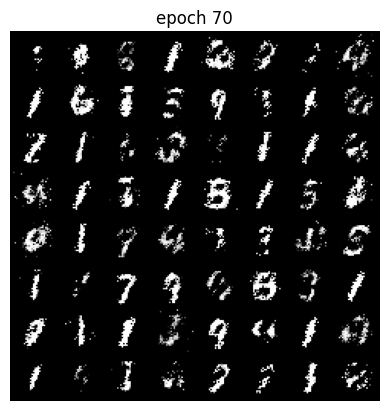

Epoch 70 of 100
Generator loss: 2.45495432, Discriminator loss: 0.62790372


118it [00:15,  7.42it/s]                                                                                               


Epoch 71 of 100
Generator loss: 2.57190106, Discriminator loss: 0.65183209


118it [00:15,  7.85it/s]                                                                                               


Epoch 72 of 100
Generator loss: 2.39907279, Discriminator loss: 0.68640783


118it [00:16,  7.06it/s]                                                                                               


Epoch 73 of 100
Generator loss: 2.28383881, Discriminator loss: 0.73506102


118it [00:15,  7.40it/s]                                                                                               


Epoch 74 of 100
Generator loss: 2.20303260, Discriminator loss: 0.72994931


118it [00:15,  7.73it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


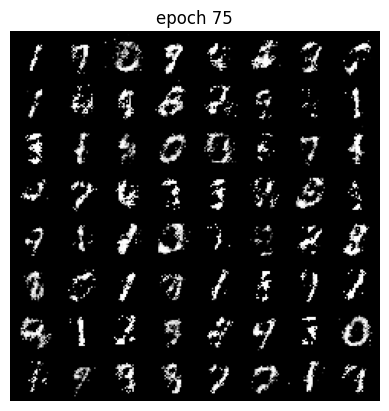

Epoch 75 of 100
Generator loss: 2.42503941, Discriminator loss: 0.67503077


118it [00:15,  7.70it/s]                                                                                               


Epoch 76 of 100
Generator loss: 2.20723994, Discriminator loss: 0.75992358


118it [00:15,  7.57it/s]                                                                                               


Epoch 77 of 100
Generator loss: 2.11861963, Discriminator loss: 0.78550859


118it [00:15,  7.66it/s]                                                                                               


Epoch 78 of 100
Generator loss: 2.12305101, Discriminator loss: 0.75712192


118it [00:15,  7.56it/s]                                                                                               


Epoch 79 of 100
Generator loss: 2.00167309, Discriminator loss: 0.78291560


118it [00:16,  7.15it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


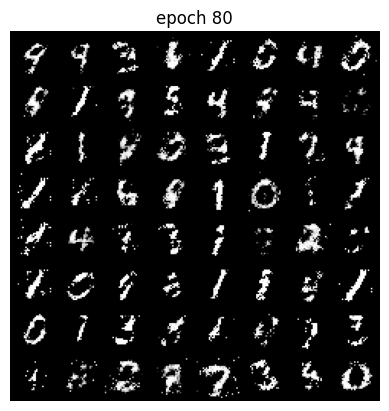

Epoch 80 of 100
Generator loss: 2.04359643, Discriminator loss: 0.76695418


118it [00:16,  7.00it/s]                                                                                               


Epoch 81 of 100
Generator loss: 2.05066098, Discriminator loss: 0.79051690


118it [00:16,  7.29it/s]                                                                                               


Epoch 82 of 100
Generator loss: 1.88063208, Discriminator loss: 0.82485976


118it [00:15,  7.60it/s]                                                                                               


Epoch 83 of 100
Generator loss: 1.90250679, Discriminator loss: 0.81705921


118it [00:16,  7.19it/s]                                                                                               


Epoch 84 of 100
Generator loss: 1.82320778, Discriminator loss: 0.86106463


118it [00:15,  7.84it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


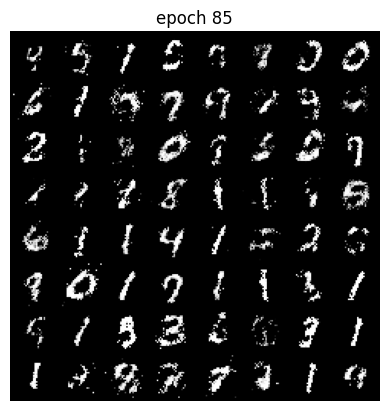

Epoch 85 of 100
Generator loss: 1.83543303, Discriminator loss: 0.85863361


118it [00:15,  7.44it/s]                                                                                               


Epoch 86 of 100
Generator loss: 1.73560526, Discriminator loss: 0.89954694


118it [00:15,  7.38it/s]                                                                                               


Epoch 87 of 100
Generator loss: 1.75479612, Discriminator loss: 0.85283897


118it [00:16,  7.29it/s]                                                                                               


Epoch 88 of 100
Generator loss: 1.75810323, Discriminator loss: 0.86101790


118it [00:16,  7.06it/s]                                                                                               


Epoch 89 of 100
Generator loss: 1.67875871, Discriminator loss: 0.88130805


118it [00:16,  7.12it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


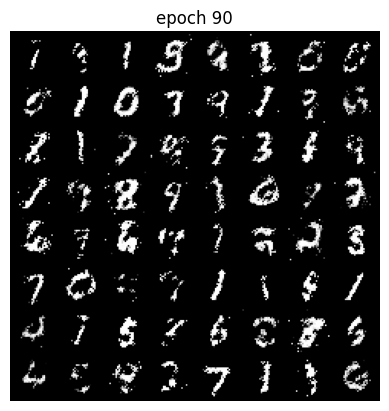

Epoch 90 of 100
Generator loss: 1.64243948, Discriminator loss: 0.89101417


118it [00:15,  7.49it/s]                                                                                               


Epoch 91 of 100
Generator loss: 1.75664656, Discriminator loss: 0.87767155


118it [00:15,  7.46it/s]                                                                                               


Epoch 92 of 100
Generator loss: 1.66878771, Discriminator loss: 0.88032345


118it [00:15,  7.51it/s]                                                                                               


Epoch 93 of 100
Generator loss: 1.71496775, Discriminator loss: 0.86148113


118it [00:15,  7.61it/s]                                                                                               


Epoch 94 of 100
Generator loss: 1.61794262, Discriminator loss: 0.91687949


118it [00:15,  7.71it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


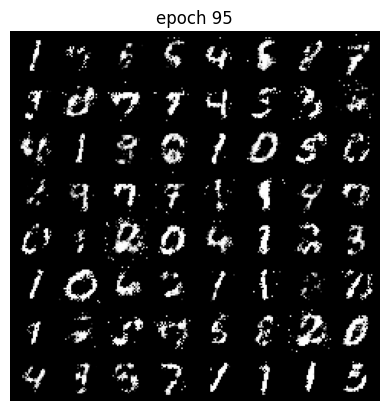

Epoch 95 of 100
Generator loss: 1.58312101, Discriminator loss: 0.95883290


118it [00:16,  7.22it/s]                                                                                               


Epoch 96 of 100
Generator loss: 1.53300251, Discriminator loss: 0.93747372


118it [00:16,  7.25it/s]                                                                                               


Epoch 97 of 100
Generator loss: 1.65602968, Discriminator loss: 0.89216323


118it [00:15,  7.38it/s]                                                                                               


Epoch 98 of 100
Generator loss: 1.60317764, Discriminator loss: 0.90660521


118it [00:15,  7.50it/s]                                                                                               


Epoch 99 of 100
Generator loss: 1.60596475, Discriminator loss: 0.90890826


118it [00:16,  7.11it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


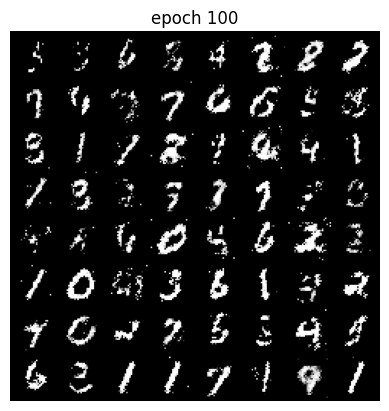

Epoch 100 of 100
Generator loss: 1.64129965, Discriminator loss: 0.87928448


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    return criterion(output, true_label)
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    return criterion(output, true_label)
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        MNISTImg, digitLabel = data
        MNISTImg = MNISTImg.to(device)
        optim_d.zero_grad()
        generatedImg = generator(noise)
        realProb = discriminator(MNISTImg)
        generatedProb = discriminator(generatedImg.detach()) 
        discriminatorLoss = discriminator_loss(realProb, label_real(len(realProb))) + discriminator_loss(generatedProb, label_fake(len(generatedProb)))
        discriminatorLoss.backward()
        optim_d.step()
        loss_d += discriminatorLoss.item()
        optim_g.zero_grad()
        generatedImg = generator(noise)
        generatedProb = discriminator(generatedImg)
        generatedLoss = generator_loss(generatedProb, label_real(len(generatedProb)))
        generatedLoss.backward()

        ############## Q1b ###############
        
        # generatedLoss = generator_loss(generatedProb, label_fake(len(generatedProb)))
        # (-g_loss).backward()
        
        ##################################
        
        optim_g.step()
        loss_g += generatedLoss.item()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

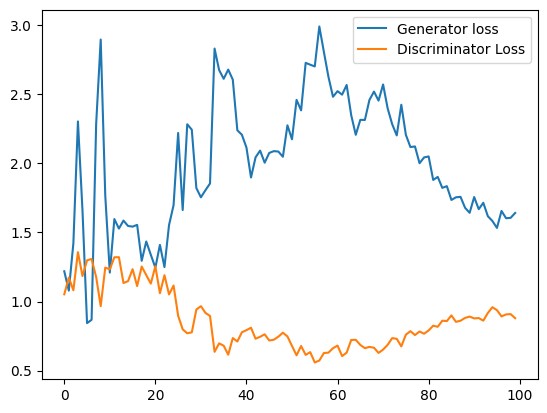

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')